In [ ]:
## https://www.kaggle.com/sadeghjalalian/wine-customer-segmentation
# 1. using KMeans to find clusters
# 2. using PCA to reduce dimensionality with KMeans

## WORKFLOW

In [63]:
## import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv('Wine.csv')
print(df.shape)
print(df.info())

(178, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


In [66]:
df.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [104]:
# drop Customer_Segment
df1 = df.drop('Customer_Segment',axis=1)
df1.shape

(178, 13)

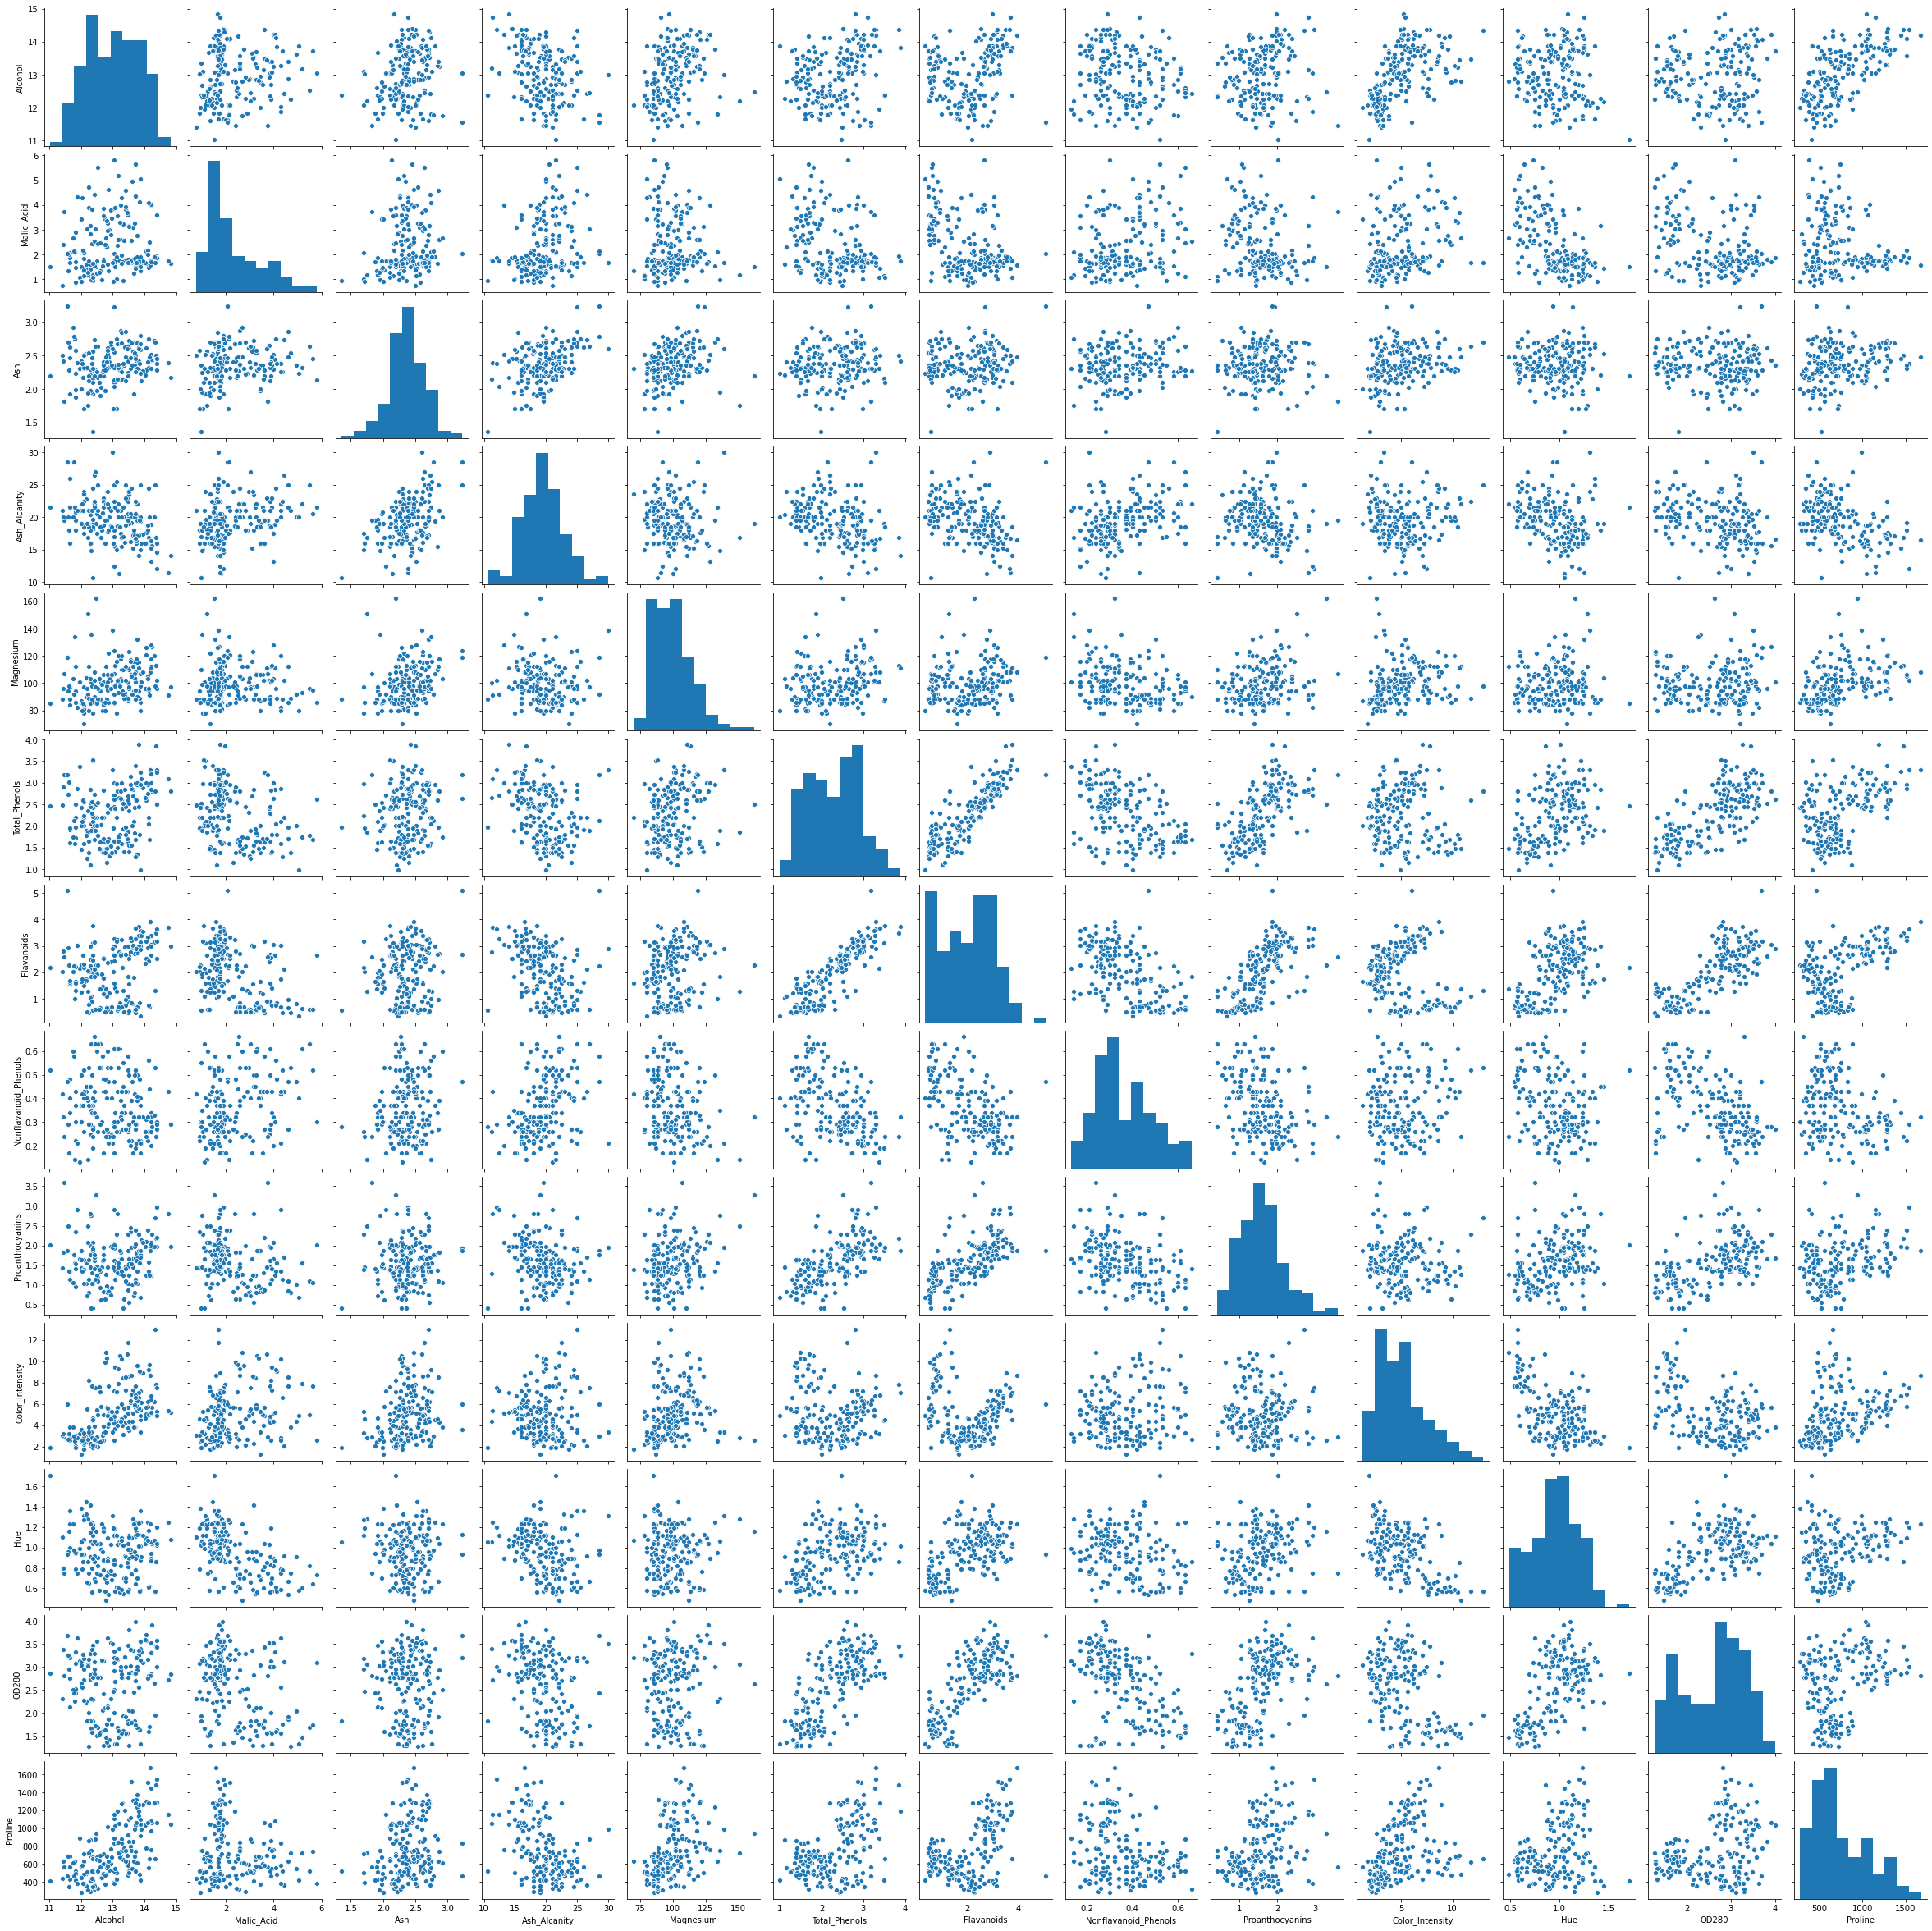

In [105]:
# EDA / Visualise features
sns.pairplot(df1)

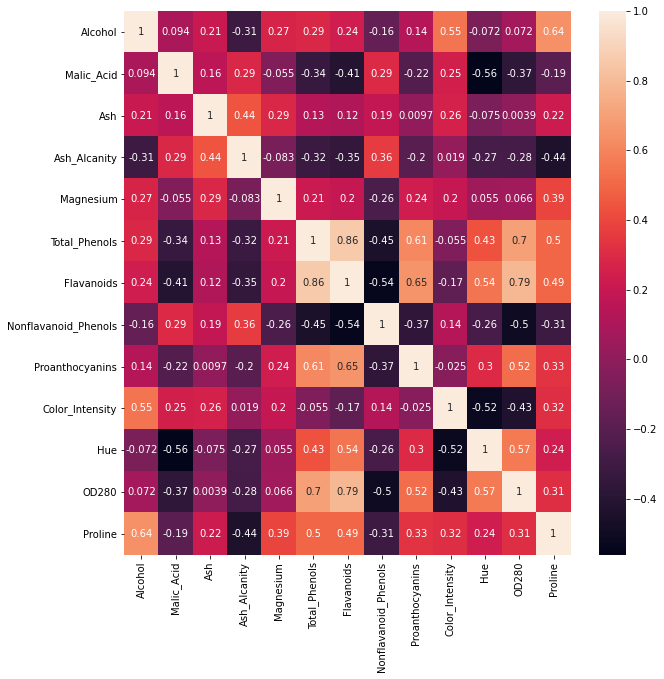

In [106]:
# any correlation between each feature
corrMatrix = df1.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [79]:
df1.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [108]:
# standardize those features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std = scaler.fit_transform(df1)

In [109]:
df_std = pd.DataFrame(std,index = df1.index, columns = df1.columns)
df_std.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [110]:
# M1: Orginal features undergo KMeans
WSS = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_std)
    WSS.append(kmeanModel.inertia_)

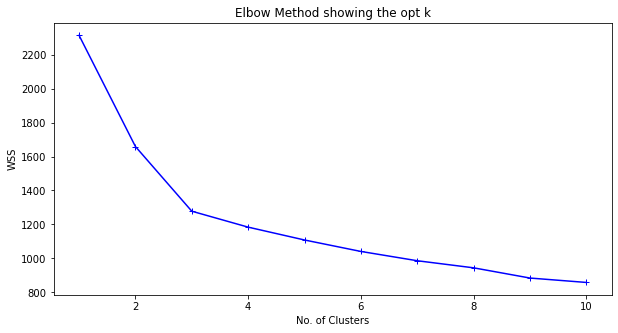

In [111]:
plt.figure(figsize=(10,5))
plt.plot(K,WSS,'b+-')
plt.xlabel('No. of Clusters')
plt.ylabel('WSS')
plt.title('Elbow Method showing the opt k')
plt.show()

In [112]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df_std)

KMeans(n_clusters=3)

In [115]:
df1['Clusters'] = kmeanModel.predict(df_std)
df1

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


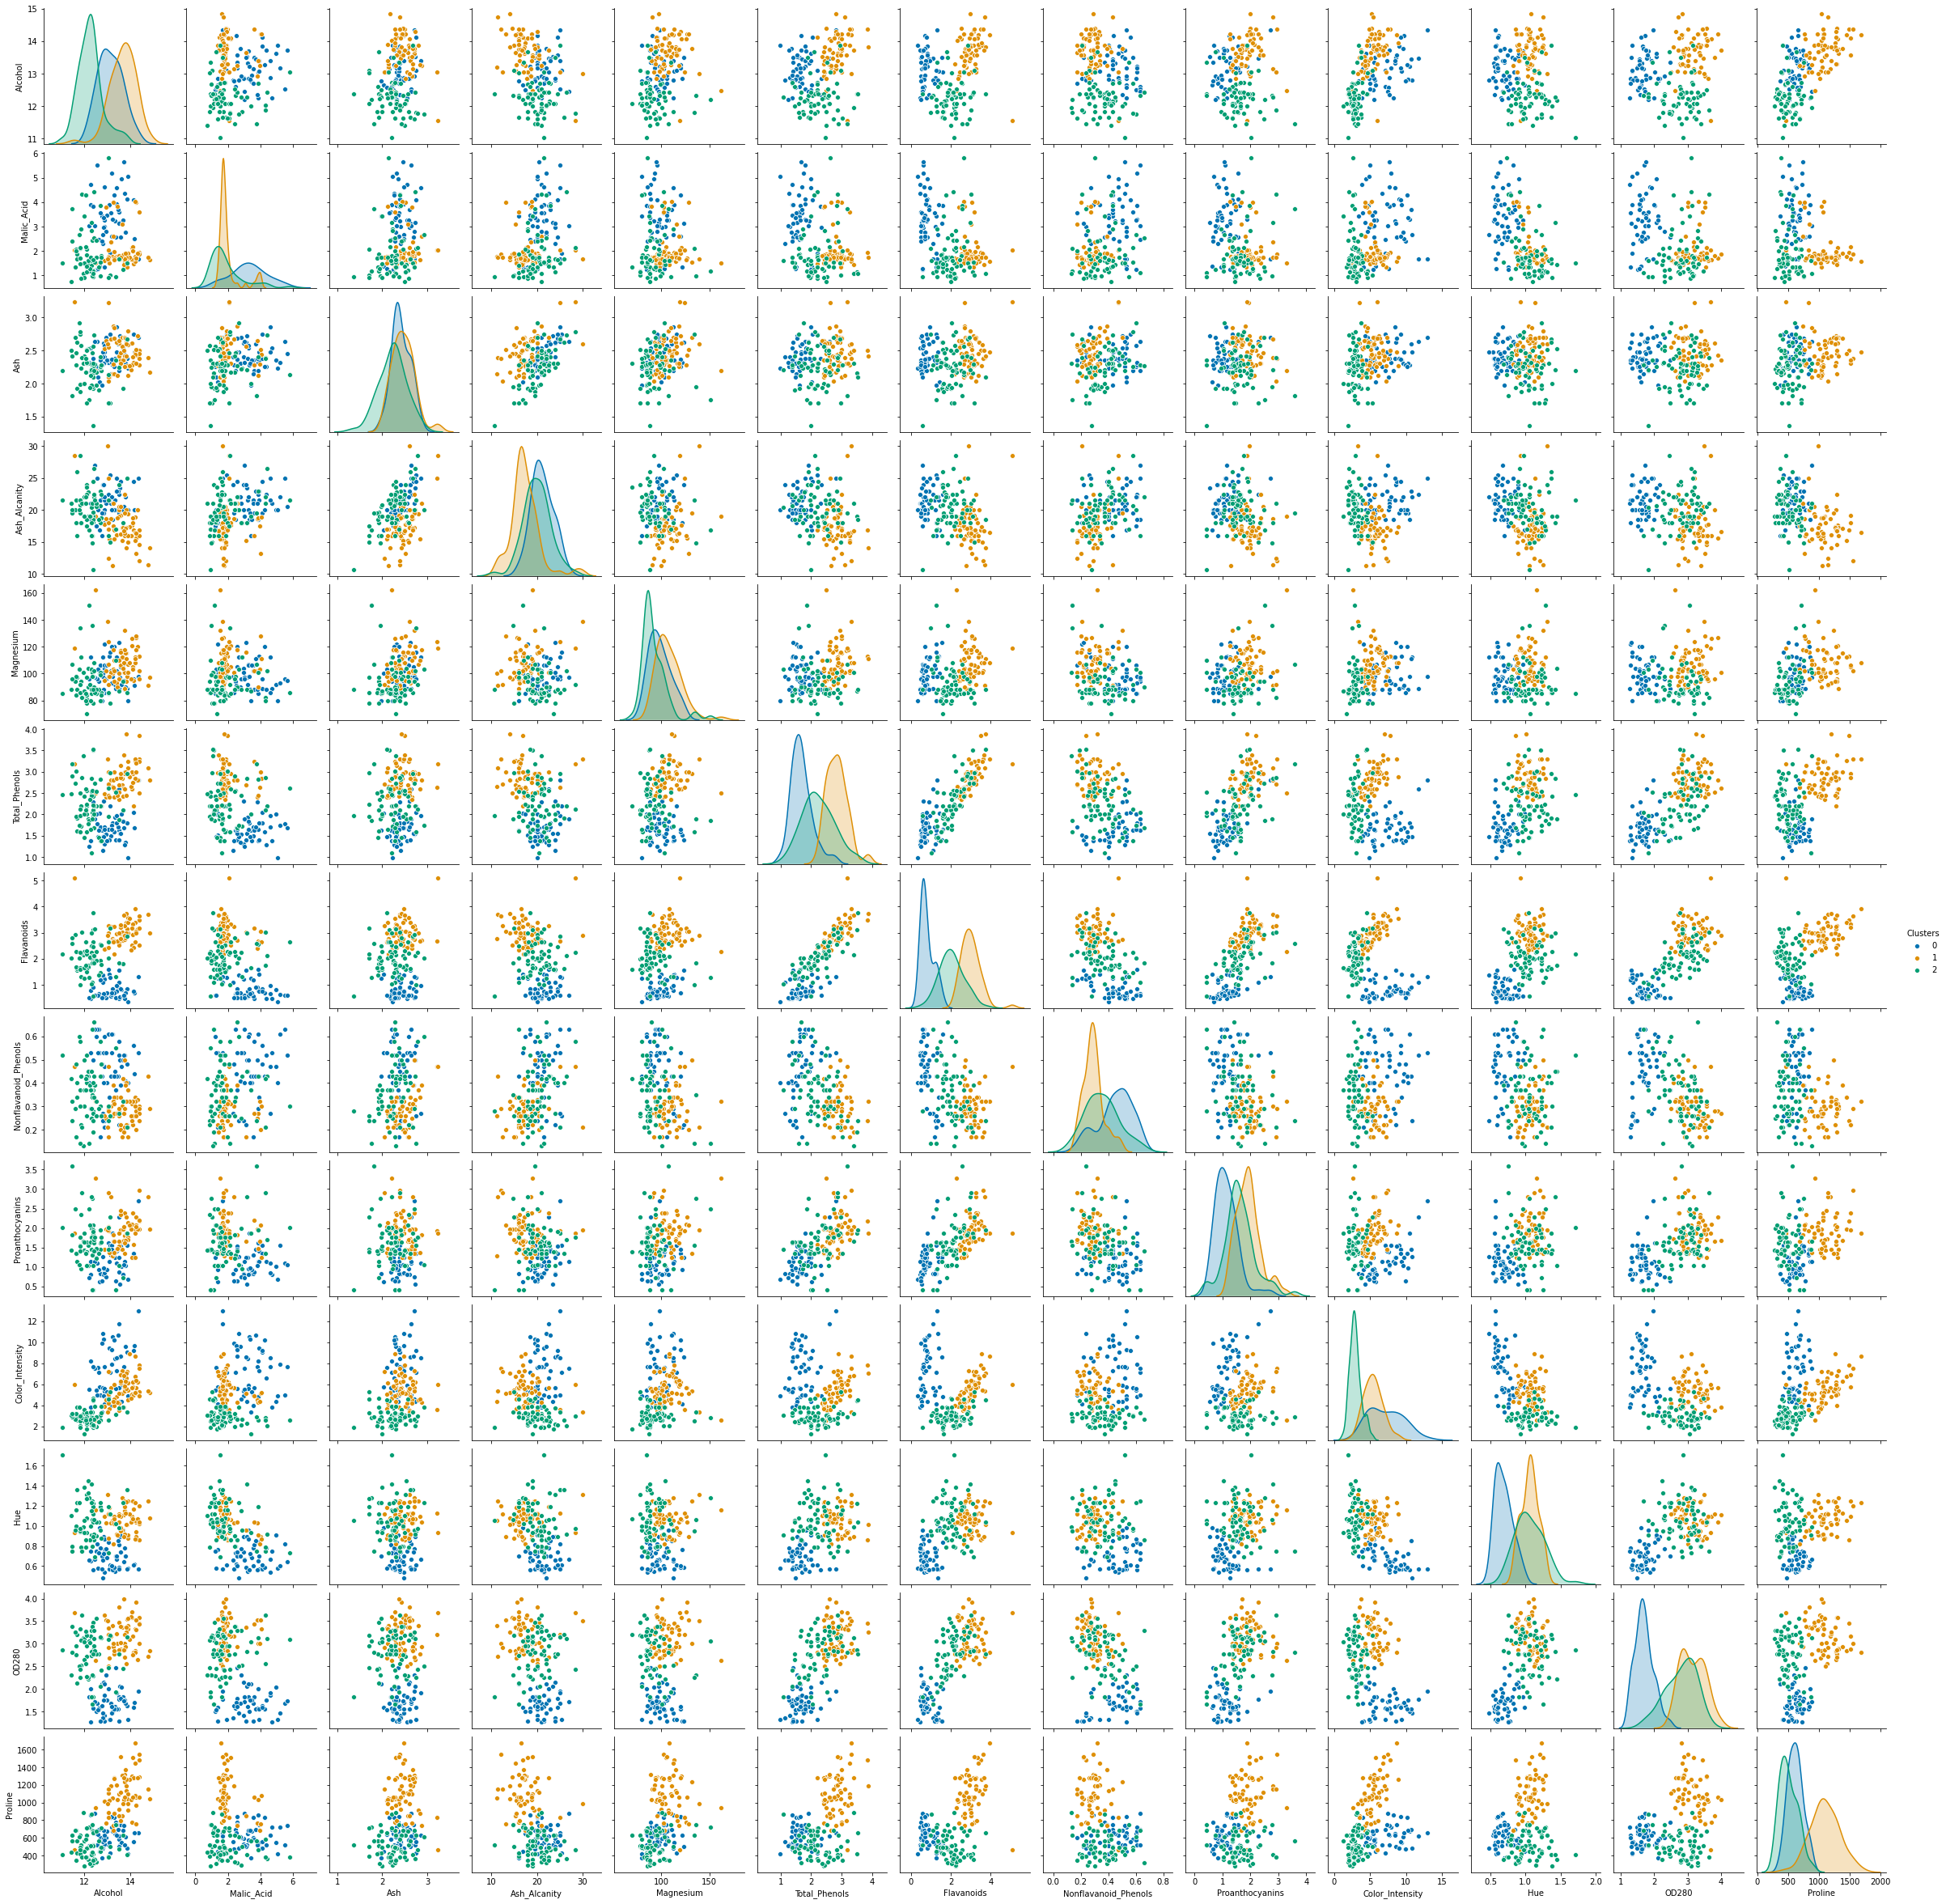

In [118]:
# display features to features relationship with clusters
sns.pairplot(df1,palette = 'colorblind',hue='Clusters');

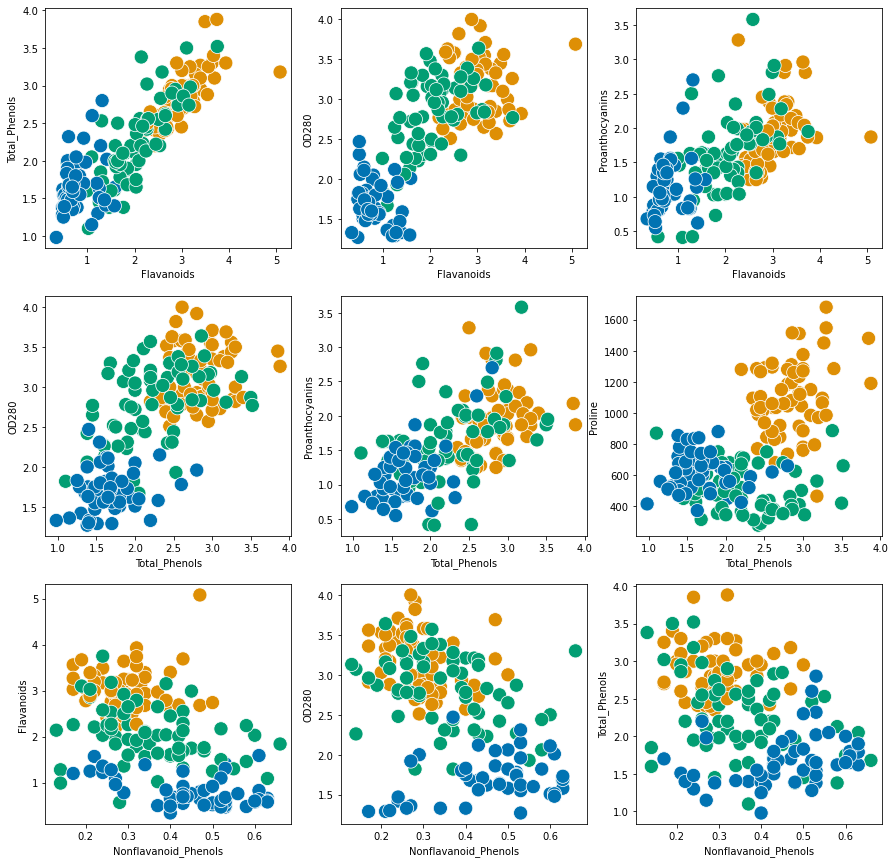

In [122]:
# show some plots
fig, axs = plt.subplots(ncols=3,nrows=3, figsize = (15,15))

sns.scatterplot(x="Flavanoids", y="Total_Phenols", hue="Clusters",
                     palette = 'colorblind', data = df1, legend = False, s = 200, ax=axs[0][0])
sns.scatterplot(x="Flavanoids", y="OD280", hue="Clusters",
                     palette = 'colorblind', data = df1, legend = False, s = 200, ax=axs[0][1])
sns.scatterplot(x="Flavanoids", y="Proanthocyanins", hue="Clusters",
                     palette = 'colorblind', data = df1, legend = False, s = 200,  ax=axs[0][2])

sns.scatterplot(x="Total_Phenols", y="OD280", hue="Clusters",
                     palette = 'colorblind', data = df1, legend = False, s = 200,  ax=axs[1][0])
sns.scatterplot(x="Total_Phenols", y="Proanthocyanins", hue="Clusters",
                     palette = 'colorblind', data = df1, legend = False, s = 200,  ax=axs[1][1])
sns.scatterplot(x="Total_Phenols", y="Proline", hue="Clusters",
                     palette = 'colorblind', data = df1, legend = False, s = 200, ax=axs[1][2])

sns.scatterplot(x="Nonflavanoid_Phenols", y="Flavanoids", hue="Clusters",
                     palette = 'colorblind', data = df1, legend = False, s = 200,  ax=axs[2][0])
sns.scatterplot(x="Nonflavanoid_Phenols", y="OD280", hue="Clusters",
                     palette = 'colorblind', data = df1, legend = False, s = 200,  ax=axs[2][1])
sns.scatterplot(x="Nonflavanoid_Phenols", y="Total_Phenols", hue="Clusters",
                     palette = 'colorblind', data = df1, legend = False, s = 200, ax=axs[2][2])

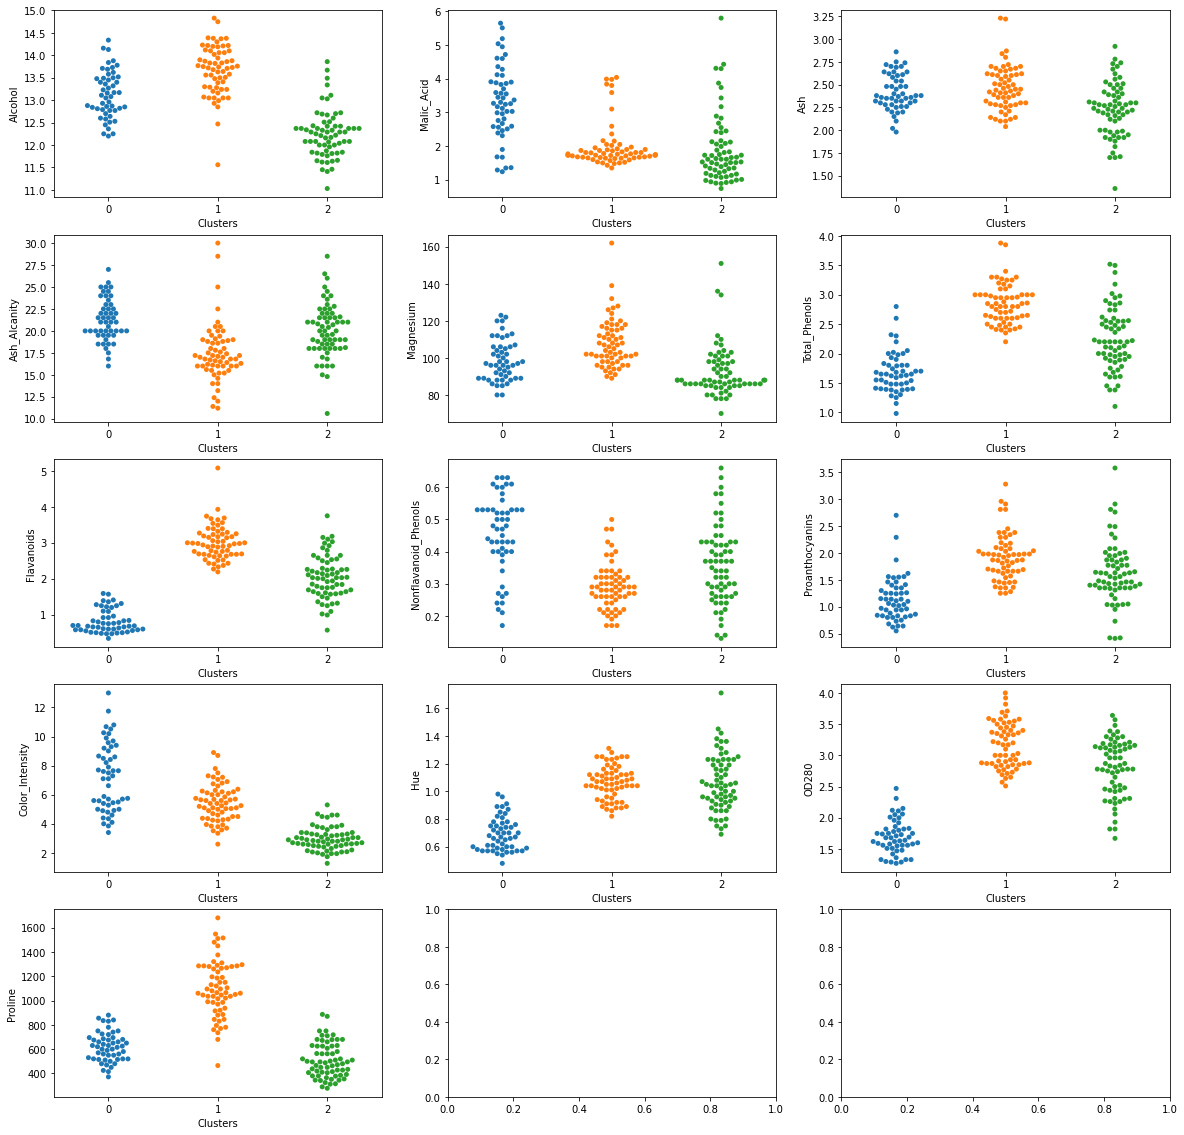

In [130]:
# Plots between each feature with Cluster 
fig, axs = plt.subplots(ncols=3,nrows=5, figsize = (20,20))

sns.swarmplot(x="Clusters", y="Alcohol",data = df1, ax=axs[0][0])
sns.swarmplot(x="Clusters", y="Malic_Acid",data = df1, ax=axs[0][1])
sns.swarmplot(x="Clusters", y="Ash",data = df1, ax=axs[0][2])
sns.swarmplot(x="Clusters", y="Ash_Alcanity",data = df1, ax=axs[1][0])
sns.swarmplot(x="Clusters", y="Magnesium",data = df1, ax=axs[1][1])
sns.swarmplot(x="Clusters", y="Total_Phenols",data = df1, ax=axs[1][2])
sns.swarmplot(x="Clusters", y="Flavanoids",data = df1, ax=axs[2][0])
sns.swarmplot(x="Clusters", y="Nonflavanoid_Phenols",data = df1, ax=axs[2][1])
sns.swarmplot(x="Clusters", y="Proanthocyanins",data = df1, ax=axs[2][2])
sns.swarmplot(x="Clusters", y="Color_Intensity",data = df1, ax=axs[3][0])
sns.swarmplot(x="Clusters", y="Hue",data = df1, ax=axs[3][1])
sns.swarmplot(x="Clusters", y="OD280",data = df1, ax=axs[3][2])
sns.swarmplot(x="Clusters", y="Proline",data = df1, ax=axs[4][0])

In [143]:
## Name of each cluster if possible
# From the graphs above:
# Cluster 0 has: low Flavanoids, Proline, OD280 and Proanthocyanins
# Cluster 1 has: high Flavanoids, Proline, OD280 and Proanthocyanins
# Cluster 2 has: broader range of Flavanoids, OD280, Proanthocyanins and lower Proline

([<matplotlib.axis.XTick at 0x139e5aca0>,
 <a list of 13 Text major ticklabel objects>)

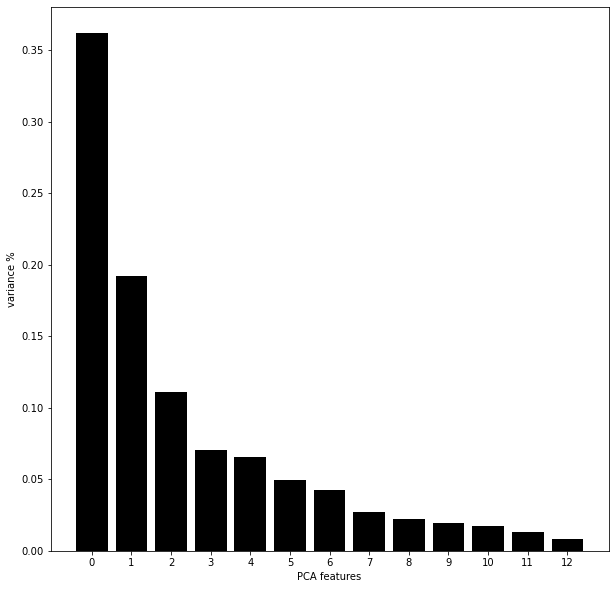

In [144]:
# M2: PCA first then undergo KMeans
from sklearn.decomposition import PCA
pca = PCA(n_components=13)
principalComponents = pca.fit_transform(df_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [134]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

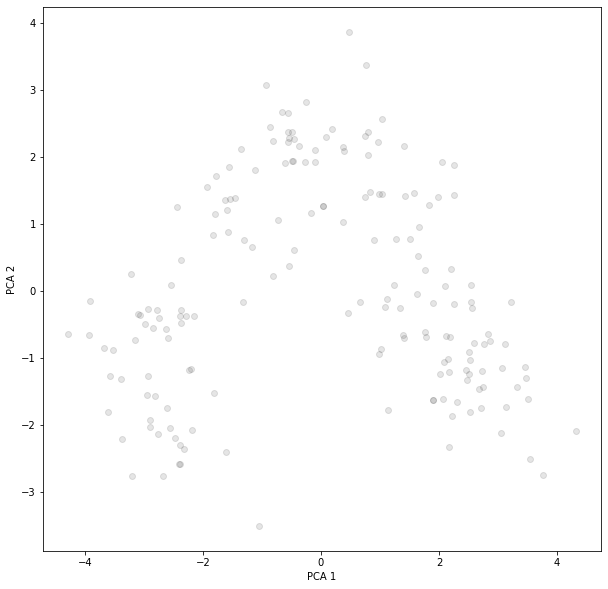

In [135]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
# Using PCA, 3 clusters can roughly be classified. 

In [139]:
inertias = []
K = range(1,11)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:3])
    inertias.append(model.inertia_)

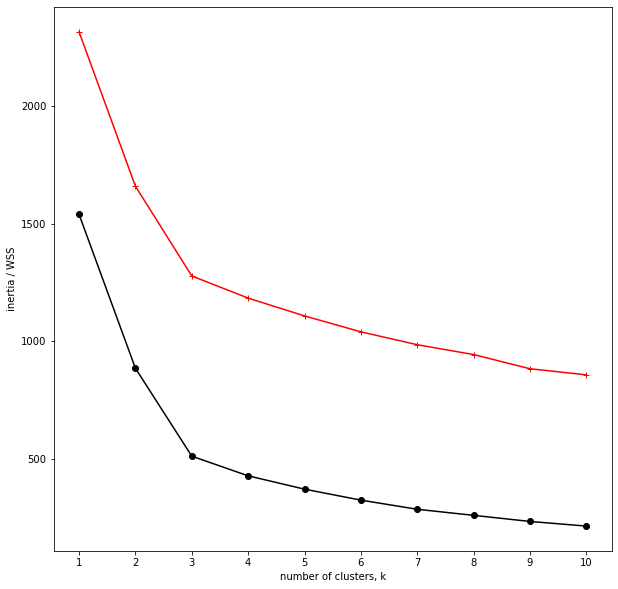

In [158]:
plt.plot(K, inertias, '-o', color='black')
plt.plot(K, WSS, 'b+-', color='red')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia / WSS')
plt.xticks(K)
plt.show()

In [146]:
model = KMeans(n_clusters=3)
model.fit(PCA_components)

KMeans(n_clusters=3)

In [147]:
PCA_components['Clusters'] = kmeanModel.predict(PCA_components)
PCA_components

,0,1,2,3,4,5,6,7,8,9,10,11,12,Clusters
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637,0
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717,1
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484,1
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427,2
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371,2
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078,2
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866,2


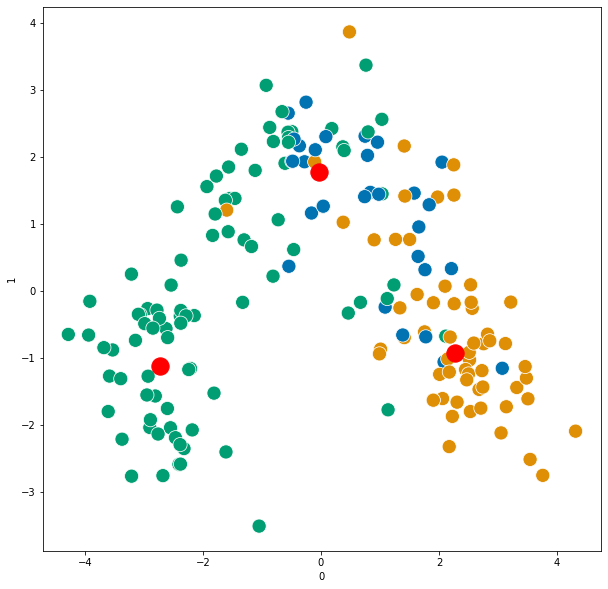

In [155]:
sns.scatterplot(x=0, y=1, hue="Clusters",
                     palette = 'colorblind', data = PCA_components, legend = False, s = 200)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='red')

## Conclusion

In [ ]:
# In this dataset, unsupervised learning KMeans is used to classify 3 clusters of wines.
# Although this dataset is not large, using PCA with KMeans is a very powerful method for visualizing high dimensional data.
# Furthermore, since this dataset also provided the actual wine segments, we can compare the KMeans "accuracy". However, it is not in this DEMO.
# Bear in mind that KMeans clutering is used for unsupervised machine learning to do classification without having labels.